SUMMARY

Avacado is a fruit consumed by people heavily in United states. 

Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [3]:
avdo=pd.read_csv('/Users/drram/Documents/avocado.csv')
avdo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [6]:
avdo.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
avdo.shape

(16468, 14)

In [10]:
avdo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [9]:
avdo.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [11]:
avdo.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [12]:
#from above we can there are 14951 rows which are empty out of 16468
#this means only head 1517 rows have values are present, so we drop rest of the rows
avdo.head(1518)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.0,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.0,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.0,conventional,2016.0,Charlotte
1516,14.0,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.0,conventional,2016.0,Charlotte


In [13]:
avcdo=avdo.drop(avdo.index[1517:16468], axis=0)

In [14]:
avcdo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [15]:
avcdo.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [16]:
avcdo.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

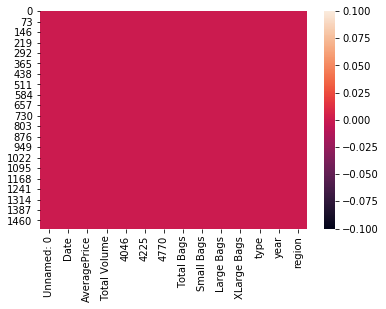

In [17]:
sns.heatmap(avcdo.isnull())

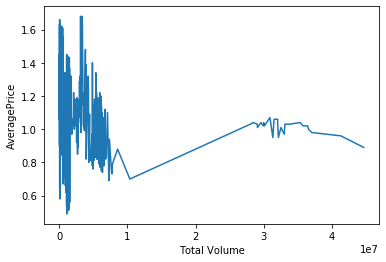

In [18]:
sns.lineplot(x='Total Volume',y='AveragePrice',data=avcdo)

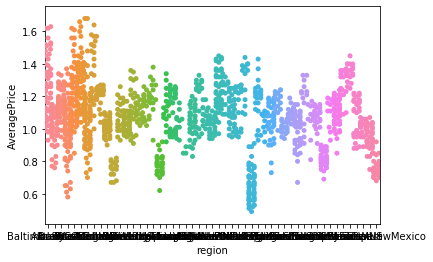

In [19]:
sns.swarmplot(x='region',y='AveragePrice',data=avcdo)

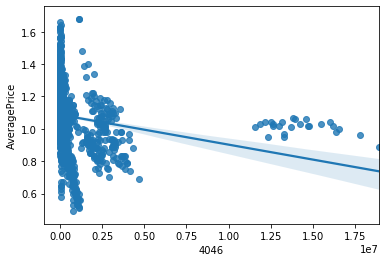

In [20]:
sns.regplot(x='4046',y='AveragePrice',data=avcdo)

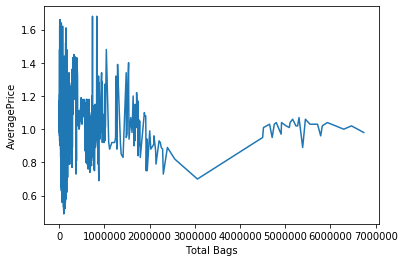

In [22]:
sns.lineplot(x='Total Bags',y='AveragePrice',data=avcdo)

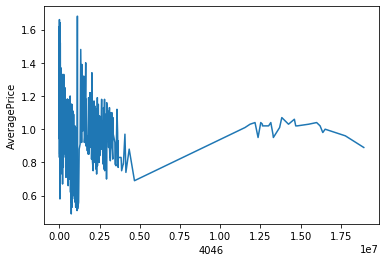

In [24]:
sns.lineplot(x='4046',y='AveragePrice',data=avcdo)

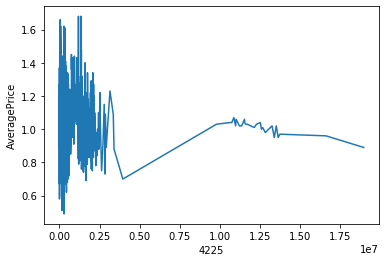

In [25]:
sns.lineplot(x='4225',y='AveragePrice',data=avcdo)

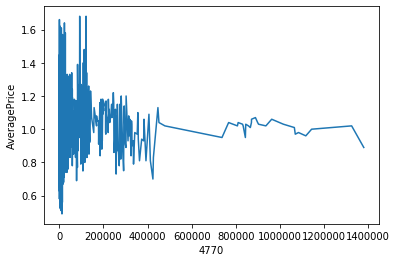

In [26]:
sns.lineplot(x='4770',y='AveragePrice',data=avcdo)

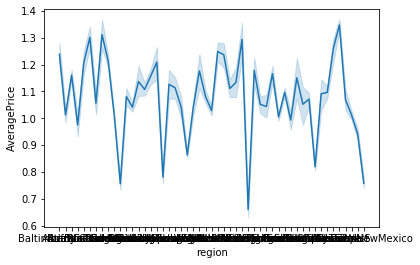

In [27]:
sns.lineplot(x='region',y='AveragePrice',data=avcdo)

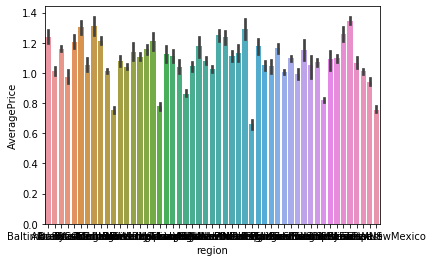

In [28]:
sns.barplot(x='region',y='AveragePrice',data=avcdo)

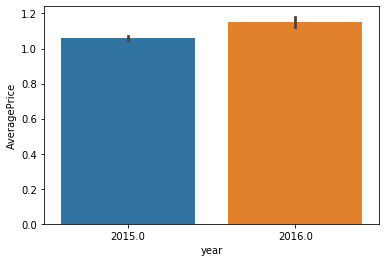

In [29]:
sns.barplot(x='year',y='AveragePrice',data=avcdo)

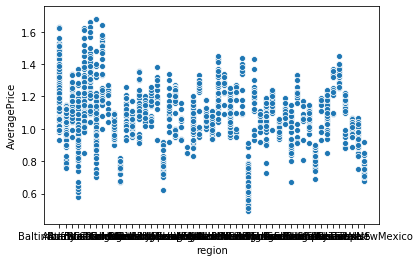

In [30]:
sns.scatterplot(x='region',y='AveragePrice',data=avcdo)

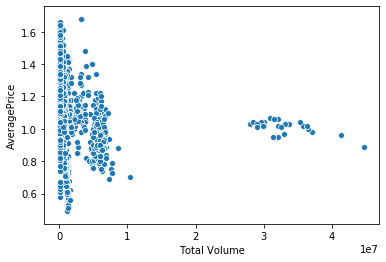

In [31]:
sns.scatterplot(x='Total Volume',y='AveragePrice',data=avcdo)

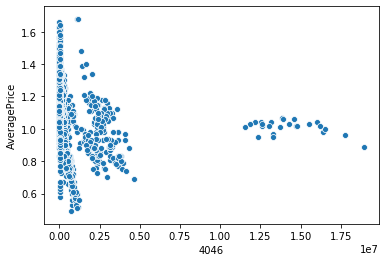

In [32]:
sns.scatterplot(x='4046',y='AveragePrice',data=avcdo)

univariate analysis

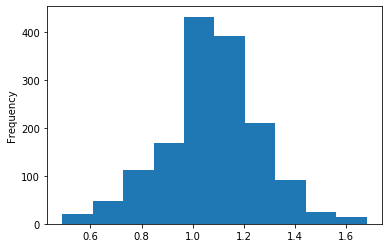

In [33]:
avcdo['AveragePrice'].plot.hist()

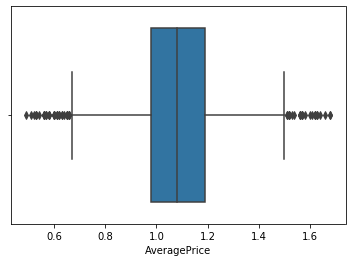

In [34]:
sns.boxplot(avcdo['AveragePrice'],data=avcdo) #this shows there r outliers

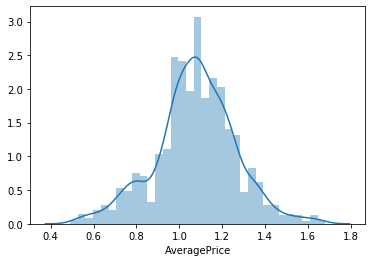

In [35]:
sns.distplot(avcdo['AveragePrice'])

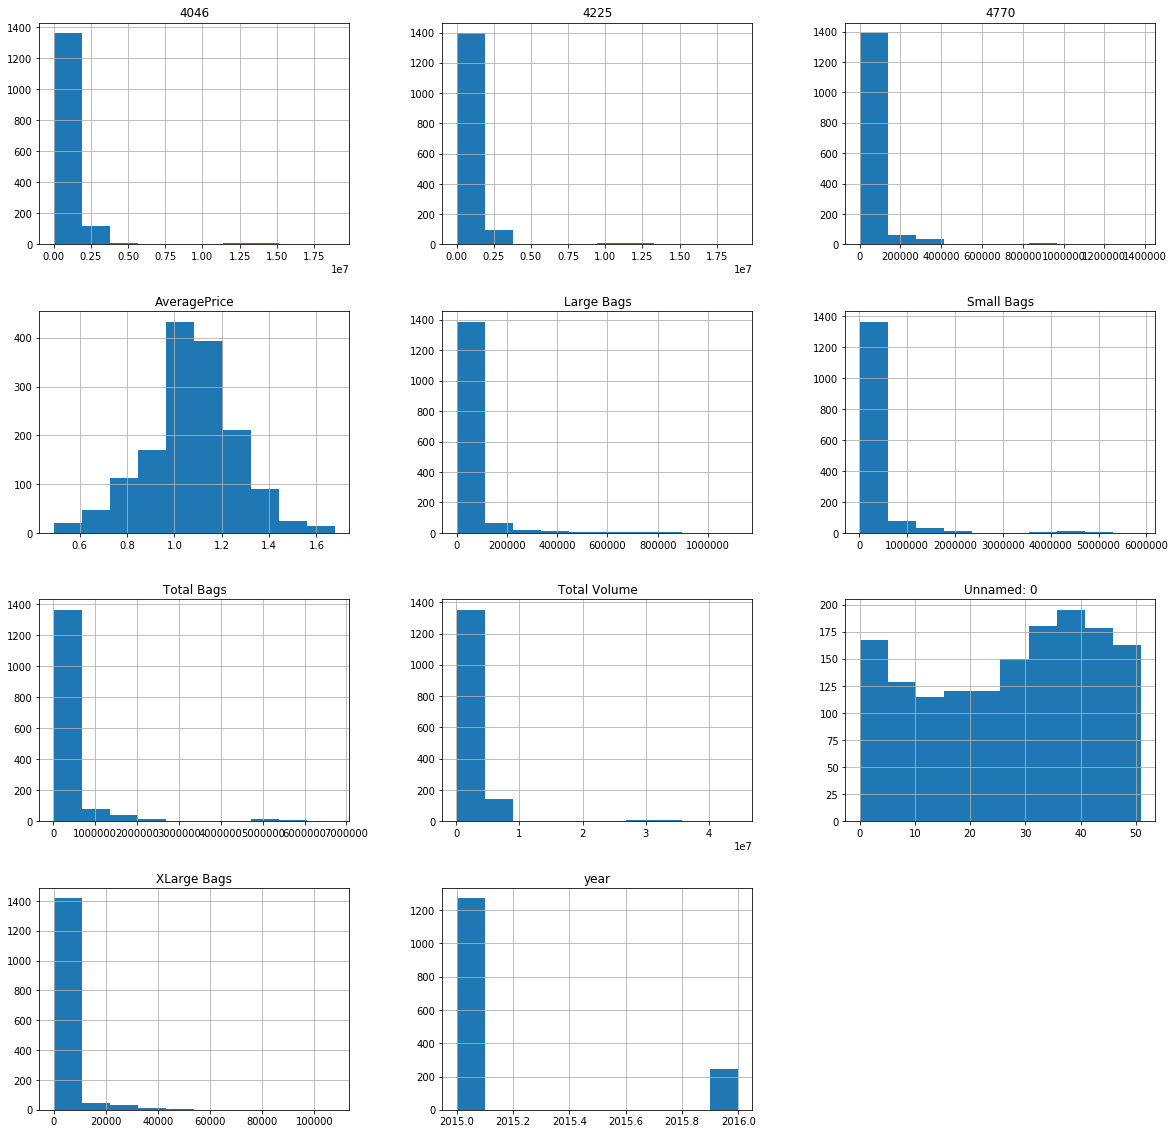

In [36]:
avcdo.hist(figsize=(20,20))
plt.show()

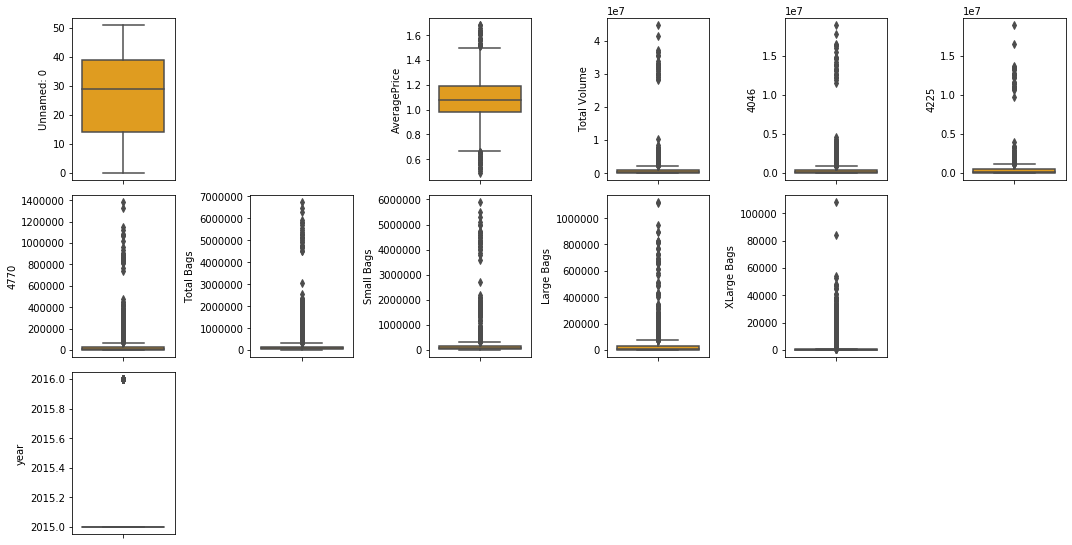

In [37]:
col_list=avcdo.columns.values
plt.figure(figsize=(15,15))
for i in range (0,len(col_list)):
    if avcdo[col_list[i]].dtype!='O':
        plt.subplot(6,6,i+1)
        sns.boxplot(avcdo[col_list[i]], color='orange',orient='v')
        plt.tight_layout()

In [38]:
avcdo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


CORRELATION

In [39]:
avcdo.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342


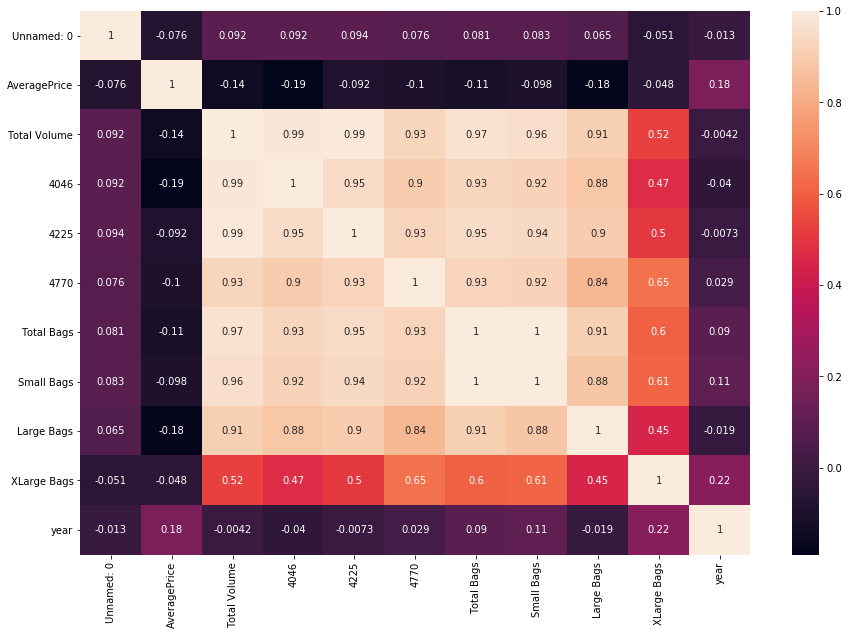

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(avcdo.corr(), annot=True)


from below heatmap it can be observeded that 'year, Xlarge bags, and AveragePrice' r negatively corr, rest all are positively corr..

STATISTICAL ANALYSIS

In [41]:
avcdo.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [42]:
region=avcdo.groupby('region').mean()
region.sort_values(by='Total Volume',ascending=False)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,,
TotalUS,39.000000,1.011600,3.293714e+07,1.422580e+07,1.243888e+07,950091.078000,5.322368e+06,4.519090e+06,779546.107600,23732.280400,2015.000000
California,26.131579,1.055921,6.035277e+06,2.410017e+06,1.984823e+06,225314.512500,1.415122e+06,1.286774e+06,109555.190526,18792.960132,2015.684211
West,17.500000,0.940833,5.574939e+06,2.348945e+06,2.040127e+06,124529.191111,1.061338e+06,7.447474e+05,315172.970278,1417.661111,2015.000000
SouthCentral,19.000000,0.818718,5.496995e+06,3.077958e+06,1.625283e+06,109997.714359,6.837558e+05,5.549597e+05,123663.470256,5132.639487,2015.000000
Northeast,45.500000,1.236667,3.465864e+06,1.073529e+05,2.427952e+06,7251.636667,9.233073e+05,8.325909e+05,90716.120000,0.272500,2015.000000
GreatLakes,37.500000,1.107222,3.276358e+06,5.652089e+05,1.720079e+06,300844.177222,6.902264e+05,5.701240e+05,103211.250556,16891.117778,2015.000000
Southeast,47.000000,1.091111,3.055239e+06,2.195695e+06,2.826350e+05,23959.242222,5.529500e+05,3.165600e+05,236389.612222,0.331111,2015.000000
LosAngeles,50.000000,0.863333,2.732180e+06,1.849780e+06,5.559236e+05,60827.640000,2.656486e+05,2.331338e+05,29588.213333,2926.593333,2015.000000
Midsouth,8.500000,1.081111,2.355099e+06,5.020956e+05,1.163150e+06,188945.888889,5.009069e+05,4.444993e+05,54315.115000,2092.557222,2015.000000


observation from above data-
-highest sales were recorded in TotalUS

In [43]:
year=avcdo.groupby('year').mean()
year

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
year,,,,,,,,,,
2015.0,27.079528,1.060110,1.610065e+06,681160.770126,616787.513780,48630.489803,263486.649244,218407.048992,43615.506961,1464.093291
2016.0,26.562753,1.151498,1.559787e+06,467907.936154,583929.347895,59532.042389,448417.955992,404909.278664,37636.822105,5871.855223


observation-

1.average price of avocado increased in the year 2016 from 1.06 to 1.15
2. total volume has been decreased in 2016
3. avocado coding with '4770' sales has been increased, while '4046' and '4225', sales has been decreased
4.total bags has been increased in 2016
5. no. of small bags and xlarge bags has been increased while larger bags decreased

In [44]:
avcdo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [45]:
#we can drop type column as it has only one value repeating throughout
avcdo=avcdo.drop('type', axis=1)
avcdo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany


In [46]:
#also we have to change some string into integer for further processing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
avcdo['region']=pd.DataFrame(le.fit_transform(avcdo['region']))
avcdo['Date']=pd.DataFrame(le.fit_transform(avcdo['Date']))
avcdo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0
1,1.0,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0
2,2.0,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0
3,3.0,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0
4,4.0,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0


##REMOVING THE OUTLIERS

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(avcdo))
print("The shape before removing the zscore", avcdo.shape)
avcdo=avcdo[(z<3).all(axis=1)]
print("The shape after removing the zscore", avcdo.shape)

The shape before removing the zscore (1517, 13)
The shape after removing the zscore (1502, 13)


##REMOVING THE SKEWNESS OF DATA

In [48]:
avcdo.skew()

Unnamed: 0     -0.234824
Date            0.012623
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [49]:
#using log method we minimise little bit of skewness
for i in avcdo.columns:
    if avcdo.skew()[i]>0.55:
        avcdo[i]=np.log1p(avcdo[i])

In [51]:
avcdo.skew()

Unnamed: 0     -0.234824
Date            0.012623
AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region          0.288146
dtype: float64

In [54]:
avcdo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.0,92,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,7.608871,0
1,1.0,68,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,7.608871,0
2,2.0,44,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,7.608871,0
3,3.0,20,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,7.608871,0
4,4.0,98,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,7.608871,0


Here we have to use both classification and regression.
classification for region and regression model for averageprice of avocado

##SPLITTING THE INPUT AND OUTPUT VARIABLES FOR CLASSIFICATION

In [55]:
x1=avcdo.iloc[:,0:-1]
y1=pd.DataFrame(avcdo.iloc[:,-1])
print(x1.shape)
print(y1.shape)

(1502, 12)
(1502, 1)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1))
x1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.818282,1.379090,1.365422,-1.375936,-1.840250,-0.561839,-1.826955,-1.712839,-1.562485,-0.959979,-0.804932,-0.439329
1,-1.750970,0.578422,1.472497,-1.488857,-2.027012,-0.681143,-1.752789,-1.646316,-1.496328,-0.947025,-0.804932,-0.439329
2,-1.683657,-0.222245,-0.776081,-0.938549,-1.955687,-0.144473,-1.438870,-1.761857,-1.612428,-0.930605,-0.804932,-0.439329
3,-1.616345,-1.022912,0.026983,-1.227667,-1.802077,-0.394396,-1.667886,-2.014484,-1.870139,-0.854726,-0.804932,-0.439329
4,-1.549033,1.579256,1.097734,-1.540837,-1.882102,-0.692004,-1.651095,-1.967967,-1.830934,-0.740434,-0.804932,-0.439329


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def max_acc_score(reg,x1,y1):
    max_acc_score=0
    for r_state in range(42,101):
        train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,random_state=r_state,test_size=0.20)
        reg.fit(train_x1,train_y1)
        pred=reg.predict(test_x1)
        acc_score=accuracy_score(test_y1,pred)
        print("The accuracy score achieved at r_state", r_state, "is", acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print("The max accuracy score ", max_acc_score, "is achieved at", final_r_state)
    return final_r_state

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

max_acc_score(dt,x1,y1)

The accuracy score achieved at r_state 42 is 0.8903654485049833
The accuracy score achieved at r_state 43 is 0.8870431893687708
The accuracy score achieved at r_state 44 is 0.893687707641196
The accuracy score achieved at r_state 45 is 0.867109634551495
The accuracy score achieved at r_state 46 is 0.893687707641196
The accuracy score achieved at r_state 47 is 0.8970099667774086
The accuracy score achieved at r_state 48 is 0.8737541528239202
The accuracy score achieved at r_state 49 is 0.9136212624584718
The accuracy score achieved at r_state 50 is 0.8737541528239202
The accuracy score achieved at r_state 51 is 0.8837209302325582
The accuracy score achieved at r_state 52 is 0.893687707641196
The accuracy score achieved at r_state 53 is 0.8438538205980066
The accuracy score achieved at r_state 54 is 0.8770764119601329
The accuracy score achieved at r_state 55 is 0.8704318936877077
The accuracy score achieved at r_state 56 is 0.8837209302325582
The accuracy score achieved at r_state 57 is

89

In [60]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cross_score=cross_val_score(dt,x1,y1,cv=5,scoring='accuracy').mean()
cross_score

0.8116456256921374

In [61]:
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,random_state=82,test_size=0.20)
print(train_x1.shape)
print(train_y1.shape)
print(test_x1.shape)
print(test_y1.shape)

(1201, 12)
(1201, 1)
(301, 12)
(301, 1)


We need to check the performance of other modules and their scores. For the same we need to use GridSearchCV to select best parameters for the models

##GRIDSEARCHCV FOR THE BEST PARAMETERS

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={'n_neighbors':(5,10,15,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdkn=GridSearchCV(kn,parameters)
gdkn.fit(train_x1,train_y1)
gdkn.best_params_



{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy'), 'splitter':('best','random')}
gddt=GridSearchCV(dt,parameters)
gddt.fit(train_x1,train_y1)
gddt.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [65]:
from sklearn.svm import SVC
sv=SVC()
parameters={'C':(1,10),'kernel':('linear','poly','rbf')}
gdsv=GridSearchCV(sv,parameters)
gdsv.fit(train_x1,train_y1)
gdsv.best_params_

{'C': 10, 'kernel': 'linear'}

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

score=[]
cv=[]


algorithms=[KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='distance'), DecisionTreeClassifier(criterion= 'entropy', splitter= 'best'), SVC(C=10, kernel='linear')]

for i in algorithms:
    print(i)
    i.fit(train_x1,train_y1)
    pred=i.predict(test_x1)
    accscore=accuracy_score(test_y1,pred)
    score.append(accscore)
    print("")
    print("The accuracy score is ", accscore)
    print("")
    cvscore=cross_val_score(i,x1,y1,cv=5,scoring='accuracy').mean()
    cv.append(cvscore)
    print("The cross val score is", cvscore)
    print()
    print(classification_report(test_y1,pred))
    print()
    print(confusion_matrix(test_y1,pred))
    print()
    print()



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

The accuracy score is  0.893687707641196

The cross val score is 0.8509147286821707

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.64      0.88      0.74         8
           2       1.00      0.78      0.88         9
           3       1.00      1.00      1.00        12
           4       0.82      1.00      0.90         9
           5       1.00      0.85      0.92        13
           6       1.00      1.00      1.00        16
           7       0.71      0.83      0.77         6
           8       0.83      1.00      0.91         5
           9       0.86      1.00      0.92        12
          10       0.60      1.00      0.75         3
          11       1.00      1.00      1.00         6
          12       1.00

In [67]:
result=pd.DataFrame({'Model':[KNeighborsClassifier, DecisionTreeClassifier, SVC],'Accuracy_Score':score,'Cross_val_score':cv})
result

,Model,Accuracy_Score,Cross_val_score
0,<class 'sklearn.neighbors._classification.KNei...,0.893688,0.850915
1,<class 'sklearn.tree._classes.DecisionTreeClas...,0.887043,0.804264
2,<class 'sklearn.svm._classes.SVC'>,0.976744,0.946084


As we can see that SVC is giving more cross_val_score, hence is the best model

#Regressor Model Development

In [68]:
x2=avcdo.drop('AveragePrice', axis=1)
y2=avcdo.AveragePrice
print(x2.shape)
print(y2.shape)

(1502, 12)
(1502,)


In [69]:
y2=y2.values.reshape(-1,1)

In [70]:
y2.shape

(1502, 1)

In [71]:
#using standardscaler to scale the input
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x2=pd.DataFrame(scaler.fit_transform(x2))
x2.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.893204,0.074910,0.076720,0.381984,0.206558,0.130829,0.131974,0.331712,0.0,0.0,0.0
1,0.019608,0.660194,0.051570,0.035244,0.359772,0.221494,0.142878,0.144331,0.334923,0.0,0.0,0.0
2,0.039216,0.427184,0.165318,0.051084,0.459691,0.284716,0.121950,0.122645,0.338993,0.0,0.0,0.0
3,0.058824,0.194175,0.105557,0.085197,0.413159,0.238593,0.076192,0.074508,0.357801,0.0,0.0,0.0
4,0.078431,0.951456,0.040825,0.067426,0.357750,0.241975,0.084618,0.081831,0.386131,0.0,0.0,0.0


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def max_r2_score(reg,x2,y2):
    max_r2_score=0
    for r_state in range(42,101):
        train_x2,test_x2,train_y2,test_y2=train_test_split(x2,y2,random_state=r_state,test_size=0.20)
        reg.fit(train_x2,train_y2)
        pred=reg.predict(test_x2)
        r2score=r2_score(test_y2,pred)
        print("The r2 score achieved at r_state", r_state, "is", r2score)
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("The max r2 score ", max_r2_score, "is achieved at", final_r_state)
    return final_r_state




In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
max_r2_score(lr,x2,y2)

The r2 score achieved at r_state 42 is 0.44849714216307224
The r2 score achieved at r_state 43 is 0.3957341131675369
The r2 score achieved at r_state 44 is 0.30583120878884906
The r2 score achieved at r_state 45 is 0.41584425376398804
The r2 score achieved at r_state 46 is 0.4224232434863906
The r2 score achieved at r_state 47 is 0.3909831635013058
The r2 score achieved at r_state 48 is 0.3626817839338625
The r2 score achieved at r_state 49 is 0.38781159325556647
The r2 score achieved at r_state 50 is 0.3980363913567704
The r2 score achieved at r_state 51 is 0.38531369584499764
The r2 score achieved at r_state 52 is 0.3894461525434947
The r2 score achieved at r_state 53 is 0.3326781173882094
The r2 score achieved at r_state 54 is 0.420710780403035
The r2 score achieved at r_state 55 is 0.38678721389292714
The r2 score achieved at r_state 56 is 0.3441227185069673
The r2 score achieved at r_state 57 is 0.41734917060570886
The r2 score achieved at r_state 58 is 0.4516845169702539
The r2 s

96

In [74]:
cross_score=cross_val_score(lr,x2,y2,cv=5,scoring='r2').mean()
cross_score

0.07324319394452998

In [75]:
train_x2,test_x2,train_y2,test_y2=train_test_split(x2,y2,random_state=78,test_size=0.20)

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10),'algorithm':('auto','ball_tree','kd_tree','brute')}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x2,train_y2)
gdk.best_params_

{'algorithm': 'auto', 'n_neighbors': 10}

In [77]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x2,train_y2)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [78]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x2,train_y2)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


score=[]
cv=[]
Mean=[]
Root=[]

models=[lr,KNeighborsRegressor(n_neighbors=10, algorithm='auto'),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x2,train_y2)
    pred=i.predict(test_x2)
    r2score=r2_score(test_y2,pred)
    score.append(r2score)
    print(i)
    print("")
    print("The r2 score is ", r2score)
    cross=cross_val_score(i,x2,y2,cv=5,scoring='r2').mean()
    cv.append(cross)
    print("")
    print("The cross validation score is", cross)
    print()
    Meanerror=mean_absolute_error(test_y2,pred)
    Mean.append(Meanerror)
    print("The mean absolute error is ", Meanerror)
    rmse=np.sqrt(Meanerror)
    Root.append(rmse)
    print()
    print("The root mean square error is", rmse)
    print()
  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The r2 score is  0.35588249698291863

The cross validation score is 0.07324319394452998

The mean absolute error is  0.12050741741286197

The root mean square error is 0.3471417828681272

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

The r2 score is  0.6830427887802131

The cross validation score is 0.0777571711349079

The mean absolute error is  0.0832956810631229

The root mean square error is 0.2886099115815722

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
        

In [116]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.355882,0.073243,0.120507,0.347142
1,KNeighborsRegressor,0.683043,0.077757,0.083296,0.288610
2,DecisionTreeRegressor,0.714700,-0.455451,0.067741,0.260271
3,SVR,0.775268,0.097735,0.072367,0.269012


##LASSO REGRESSION

In [83]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(train_x2,train_y2)
gdls.best_params_

{'alpha': 0.001}

In [84]:
#Lets check the r2 score for lasso
ls=Lasso(alpha=0.001)
max_r2_score(ls,x2,y2)

The r2 score achieved at r_state 42 is 0.3640812677811345
The r2 score achieved at r_state 43 is 0.3518924084684101
The r2 score achieved at r_state 44 is 0.2872229149944784
The r2 score achieved at r_state 45 is 0.3588214262111673
The r2 score achieved at r_state 46 is 0.39235123797168825
The r2 score achieved at r_state 47 is 0.3374378909184226
The r2 score achieved at r_state 48 is 0.29805251516461384
The r2 score achieved at r_state 49 is 0.3079796307456948
The r2 score achieved at r_state 50 is 0.34723480625087066
The r2 score achieved at r_state 51 is 0.3290232789815065
The r2 score achieved at r_state 52 is 0.35608453656753825
The r2 score achieved at r_state 53 is 0.31504461336719336
The r2 score achieved at r_state 54 is 0.3452962224219237
The r2 score achieved at r_state 55 is 0.3421491892767534
The r2 score achieved at r_state 56 is 0.35082734309447483
The r2 score achieved at r_state 57 is 0.3265588464211574
The r2 score achieved at r_state 58 is 0.35380967665737595
The r2 

96

In [85]:
#Lets check the cross val score
cvscore=cross_val_score(ls,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)



The cross validation score is 0.09060143871551803


##RIDGE

In [86]:
#Lets check the best parameters for ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(train_x2,train_y2)
grd.best_params_

{'alpha': 0.01}

In [89]:
#Lets check the r2 score for ridge
rd=Ridge(alpha=0.01)
max_r2_score(rd,x2,y2)

The r2 score achieved at r_state 42 is 0.4482975107121634
The r2 score achieved at r_state 43 is 0.3955170613567548
The r2 score achieved at r_state 44 is 0.3062140615853475
The r2 score achieved at r_state 45 is 0.4157856211802342
The r2 score achieved at r_state 46 is 0.42249807184685395
The r2 score achieved at r_state 47 is 0.3911926587276515
The r2 score achieved at r_state 48 is 0.36266308662300917
The r2 score achieved at r_state 49 is 0.3877619835103958
The r2 score achieved at r_state 50 is 0.39842049031107796
The r2 score achieved at r_state 51 is 0.38497509894396564
The r2 score achieved at r_state 52 is 0.38996876541766445
The r2 score achieved at r_state 53 is 0.3334552046059056
The r2 score achieved at r_state 54 is 0.4203173951172635
The r2 score achieved at r_state 55 is 0.3867430883978268
The r2 score achieved at r_state 56 is 0.34524272901077224
The r2 score achieved at r_state 57 is 0.416821502493403
The r2 score achieved at r_state 58 is 0.4510264890563521
The r2 sc

96

In [90]:
#Lets check the cross val score
cvscore=cross_val_score(rd,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.0723504853593562


##ENSEMBLE TECHNIQUES

In [91]:
#Since the cross validation score is low, we can try to boost the model by using ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [93]:
#Selecting the best parameters using GridSearchCV
rfr=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500), 'criterion':('mse','mae')}
gdrf=GridSearchCV(rfr,parameters)
gdrf.fit(train_x2,train_y2)
gdrf.best_params_

{'criterion': 'mae', 'n_estimators': 500}

In [95]:
rfr=RandomForestRegressor(criterion='mae',n_estimators=500)
max_r2_score(rfr,x2,y2)

The r2 score achieved at r_state 42 is 0.8276053249127123
The r2 score achieved at r_state 43 is 0.808846715677091
The r2 score achieved at r_state 44 is 0.7995964102457246
The r2 score achieved at r_state 45 is 0.8220807454655765
The r2 score achieved at r_state 46 is 0.8391060597958871
The r2 score achieved at r_state 47 is 0.84545657046269
The r2 score achieved at r_state 48 is 0.7916280147531909
The r2 score achieved at r_state 49 is 0.8140428969644018
The r2 score achieved at r_state 50 is 0.8017586574030904
The r2 score achieved at r_state 51 is 0.8240838981501526
The r2 score achieved at r_state 52 is 0.8124731205542728
The r2 score achieved at r_state 53 is 0.802822084912546
The r2 score achieved at r_state 54 is 0.8133075588529132
The r2 score achieved at r_state 55 is 0.8420365370489944
The r2 score achieved at r_state 56 is 0.8208973222747029
The r2 score achieved at r_state 57 is 0.8344118908569484
The r2 score achieved at r_state 58 is 0.8243574004276755
The r2 score achie

95

In [97]:
#Lets check the cross val score
cvscore=cross_val_score(rfr,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.1988577582470998


##GRADIENTBOOSTER

In [99]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x2,train_y2)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [100]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gb,x2,y2)

The r2 score achieved at r_state 42 is 0.8553734134310318
The r2 score achieved at r_state 43 is 0.8377452664365383
The r2 score achieved at r_state 44 is 0.7982415460382792
The r2 score achieved at r_state 45 is 0.8160115424299806
The r2 score achieved at r_state 46 is 0.8342844463867063
The r2 score achieved at r_state 47 is 0.8437634930663327
The r2 score achieved at r_state 48 is 0.8265291927687264
The r2 score achieved at r_state 49 is 0.8134823662845454
The r2 score achieved at r_state 50 is 0.8524024408867404
The r2 score achieved at r_state 51 is 0.8353856308374518
The r2 score achieved at r_state 52 is 0.8157095508654814
The r2 score achieved at r_state 53 is 0.8329035529079011
The r2 score achieved at r_state 54 is 0.822749503455102
The r2 score achieved at r_state 55 is 0.851124282646474
The r2 score achieved at r_state 56 is 0.8195439078742144
The r2 score achieved at r_state 57 is 0.8414027021541624
The r2 score achieved at r_state 58 is 0.8346979224573599
The r2 score ach

95

In [101]:
#Lets check the cross val score
cvscore=cross_val_score(gb,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.15229545172579514


AdaBoostRegressor


In [102]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x2,train_y2)
gad.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [103]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=500,learning_rate=1)
max_r2_score(ad,x2,y2)

The r2 score achieved at r_state 42 is 0.7134464022570053
The r2 score achieved at r_state 43 is 0.708463964193536
The r2 score achieved at r_state 44 is 0.6120980705538683
The r2 score achieved at r_state 45 is 0.6470528193017803
The r2 score achieved at r_state 46 is 0.6575334937348437
The r2 score achieved at r_state 47 is 0.6650690745730414
The r2 score achieved at r_state 48 is 0.6978065259768567
The r2 score achieved at r_state 49 is 0.6386176327994161
The r2 score achieved at r_state 50 is 0.7074882853630255
The r2 score achieved at r_state 51 is 0.6267902122816252
The r2 score achieved at r_state 52 is 0.6316276281202406
The r2 score achieved at r_state 53 is 0.6607074176863892
The r2 score achieved at r_state 54 is 0.7092027215402337
The r2 score achieved at r_state 55 is 0.7243336538029757
The r2 score achieved at r_state 56 is 0.662318429021121
The r2 score achieved at r_state 57 is 0.6544215983154582
The r2 score achieved at r_state 58 is 0.6537852770879373
The r2 score ach

95

In [104]:
#Lets check the cross val score
cvscore=cross_val_score(ad,x2,y2,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.23186919005644988


In [105]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.395,0.463,0.86,0.885,0.727],'Cross_val_score':[0.09,0.072,0.198,0.15,0.231]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.395,0.090
1,Ridge,0.463,0.072
2,RandomForestRegressor,0.860,0.198
3,GradientBoostRegressor,0.885,0.150
4,AdaBoostRegressor,0.727,0.231


In [117]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.355882,0.073243,0.120507,0.347142
1,KNeighborsRegressor,0.683043,0.077757,0.083296,0.288610
2,DecisionTreeRegressor,0.714700,-0.455451,0.067741,0.260271
3,SVR,0.775268,0.097735,0.072367,0.269012


In [119]:
#so, by seeing this we will choose grientbosstingregressor as the best algorithm for this model
train_x2,test_x2,train_y2,test_y2=train_test_split(x2,y2,random_state=78,test_size=0.20)
gb=GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 500)
gb.fit(train_x2,train_y2)
predrf=gb.predict(test_x2)
r2score=r2_score(test_y2,predrf)
print("The r2 score is", r2score)
crosscore=cross_val_score(gb,x2,y2,cv=5,scoring='r2').mean()
print("The cross val score is", crosscore)
pd.DataFrame(pred).to_csv("Project3_Avacado_predictions.csv")

The r2 score is 0.8611745447883206
The cross val score is 0.16875040044911555


In [120]:
#saving the finalised model
from sklearn.externals import joblib
joblib.dump(gb,'Avacado_Regression.pkl')

['Avacado_Regression.pkl']